In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import ConvexHull

In [7]:
def load_polyline(csv_path):
    """Load polyline data from a CSV file and return as a DataFrame."""
    return pd.read_csv(csv_path)

In [8]:
def detect_outliers(polyline):
    """Detect outliers in polyline data based on distance deviations."""
    # Calculate distances between consecutive points
    distances = np.sqrt(np.sum(np.diff(polyline, axis=0)**2, axis=1))
    median_distance = np.median(distances)
    deviation = np.abs(distances - median_distance)

    # Consider points with a deviation more than twice the median as potential outliers
    outlier_indices = np.where(deviation > 2 * median_distance)[0]
    
    return outlier_indices

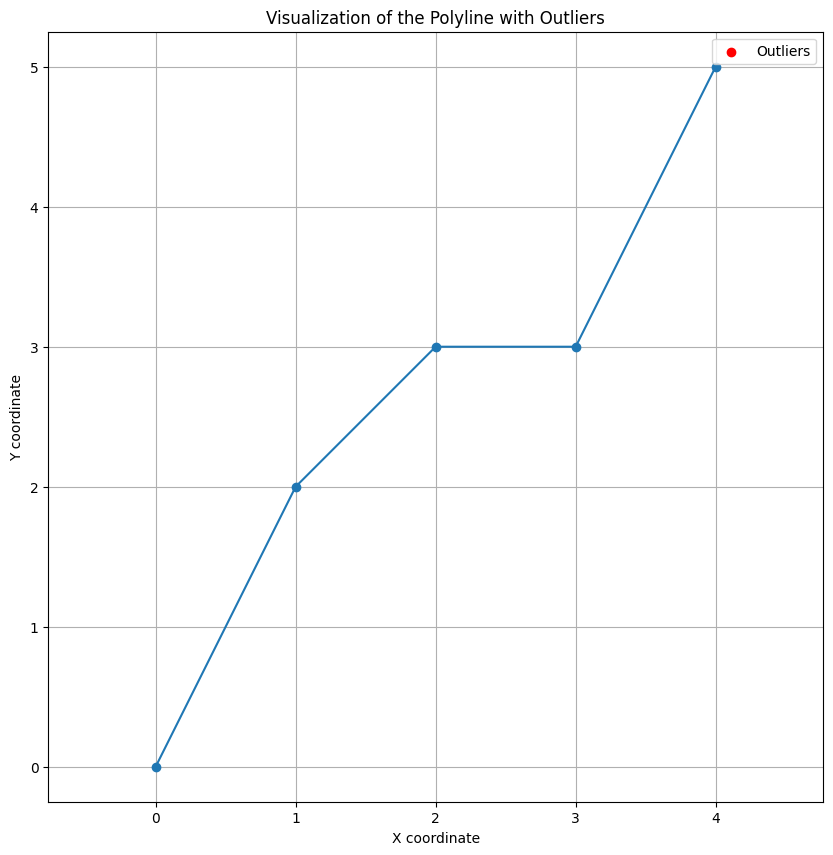

In [9]:
polyline = load_polyline('../data/raw/sample_polyline.csv')
outlier_indices = detect_outliers(polyline.values)

plt.figure(figsize=(10, 10))
plt.plot(polyline['x'], polyline['y'], marker='o', linestyle='-')
plt.scatter(polyline.iloc[outlier_indices + 1]['x'], polyline.iloc[outlier_indices + 1]['y'], color='red', label='Outliers')
plt.title("Visualization of the Polyline with Outliers")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [10]:
def calculate_features(polyline):
    """Calculate distances, angles, and bounding box area for given polyline."""
    diffs = np.diff(polyline, axis=0)
    distances = np.sqrt(np.sum(diffs**2, axis=1))
    angles = np.arctan2(diffs[:, 1], diffs[:, 0]) * 180 / np.pi

    # Calculate bounding box area
    hull = ConvexHull(polyline)
    hull_area = hull.volume  # In 2D, 'volume' attribute gives the area

    return distances, angles, hull_area

distances, angles, hull_area = calculate_features(polyline.values)
print("Distances:", distances)
print("Angles:", angles)
print("Bounding Box Area:", hull_area)

Distances: [2.23606798 1.41421356 1.         2.23606798]
Angles: [63.43494882 45.          0.         63.43494882]
Bounding Box Area: 3.0
